In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Palladium.csv')
df.head(5)

,Date,Open,Close,High,Low
0,3/26/2024,1008.0,995.5,1021.5,992.5
1,3/25/2024,986.0,1007.5,1027.0,985.5
2,3/24/2024,0.0,984.0,0.0,983.0
3,3/23/2024,992.5,992.5,992.5,992.5
4,3/22/2024,1008.5,992.5,1018.0,983.5


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Date,Open,Close,High,Low
1686,2019-03-01,1545.5,1551.5,1564.0,1529.0
1685,2019-03-03,1551.5,1549.5,1551.5,1549.5
1684,2019-03-04,1552.5,1535.5,1561.5,1515.5
1683,2019-03-05,1533.0,1514.5,1537.0,1505.5
1682,2019-03-06,1518.5,1535.0,1542.5,1507.0
...,...,...,...,...,...
4,2024-03-22,1008.5,992.5,1018.0,983.5
3,2024-03-23,992.5,992.5,992.5,992.5
2,2024-03-24,0.0,984.0,0.0,983.0
1,2024-03-25,986.0,1007.5,1027.0,985.5


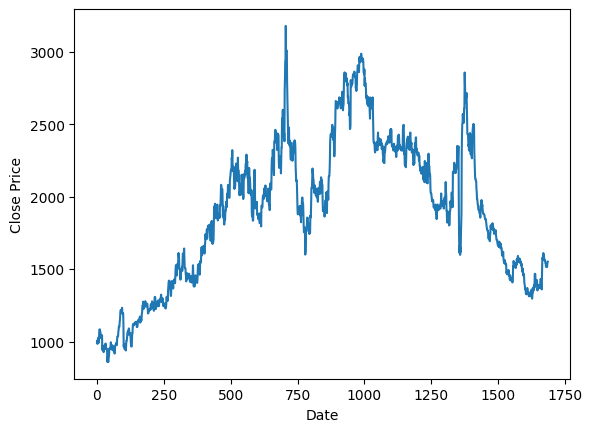

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [5]:
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df.head(5)

,Close
0,1551.5
1,1549.5
2,1535.5
3,1514.5
4,1535.0


In [6]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
train_data

array([[0.29846884],
       [0.29760621],
       [0.29156782],
       ...,
       [0.67500539],
       [0.67974984],
       [0.63575588]])

In [9]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [10]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [11]:
X_test

array([[0.63058012, 0.65236144, 0.65236144, ..., 0.50614622, 0.45180073,
        0.4684063 ],
       [0.65236144, 0.65236144, 0.65236144, ..., 0.45180073, 0.4684063 ,
        0.4684063 ],
       [0.65236144, 0.65236144, 0.65236144, ..., 0.4684063 , 0.4684063 ,
        0.4684063 ],
       ...,
       [0.04097477, 0.0547768 , 0.03946517, ..., 0.07310761, 0.06448135,
        0.05736468],
       [0.0547768 , 0.03946517, 0.04766013, ..., 0.06448135, 0.05736468,
        0.05736468],
       [0.03946517, 0.04766013, 0.04960104, ..., 0.05736468, 0.05736468,
        0.05369851]])

In [12]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(981, 30) (981,)
(644, 30) (644,)


In [13]:
model = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = [0.1, 1, 10]  # Thay đổi tại đây
gamma_range = [0.01, 0.1, 1]  # Thay đổi tại đây
kernel_range = ['rbf', 'poly', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(model, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.020 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.080 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.011 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.006 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.054 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.012 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.006 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=linear;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [15]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [16]:
y_pred

array([1968.55185121, 2054.03658447, 2032.00420897, 2108.1248178 ,
       2127.61332882, 2053.75238525, 2031.16561354, 2030.89114352,
       2012.49019205, 2028.22276402, 2078.06295903, 2101.09219615,
       2094.10807242, 2105.27288554, 2120.98356809, 2116.35481114,
       2122.60327831, 2148.49525318, 2129.06483459, 2101.99913637,
       2088.02692972, 1985.17261766, 1947.81622619, 1991.73704275,
       2025.01945274, 2047.70131907, 1989.5289083 , 1964.0030378 ,
       1936.02039001, 1928.5110232 , 1944.18211459, 1830.16013947,
       1817.2474683 , 1864.64828315, 1882.09199894, 1856.99731848,
       1862.01132155, 1894.8698521 , 1887.70548912, 1931.90011042,
       1919.84611557, 1901.21060435, 1936.14181978, 1950.15816136,
       1950.61505708, 1937.60293893, 1932.20397989, 2008.51417892,
       2008.02364758, 2039.6168658 , 2051.1684505 , 2004.90715453,
       1993.64111493, 1950.99972801, 2036.66295709, 2207.6388816 ,
       2233.23565676, 2210.31273997, 2074.06379921, 1986.64966

In [17]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.9998386053009198
Testing MSE: 2697986.629215182
Testing RMSE: 1642.5549090411505


In [18]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.04960104 0.04960104 0.04334699 0.03709295 0.02911365 0.03601466
 0.04226871 0.04270002 0.04701316 0.03558335 0.07957731 0.07677378
 0.06944145 0.07224499 0.07634246 0.07806772 0.08885055 0.08971318
 0.09682985 0.09682985 0.09618288 0.07483287 0.05758033 0.07310761
 0.06448135 0.05736468 0.05736468 0.05369851 0.06383438 0.05865862]
0 day output 0.10875915194344145
1 day input [0.04960104 0.04334699 0.03709295 0.02911365 0.03601466 0.04226871
 0.04270002 0.04701316 0.03558335 0.07957731 0.07677378 0.06944145
 0.07224499 0.07634246 0.07806772 0.08885055 0.08971318 0.09682985
 0.09682985 0.09618288 0.07483287 0.05758033 0.07310761 0.06448135
 0.05736468 0.05736468 0.05369851 0.06383438 0.05865862 0.10875915]
1 day output 0.15554598537083136
2 day input [0.04334699 0.03709295 0.02911365 0.03601466 0.04226871 0.04270002
 0.04701316 0.03558335 0.07957731 0.07677378 0.06944145 0.07224499
 0.07634246 0.07806772 0.08885055 0.08971318 0.09682985 0.09682985
 0.09618288 0.07483287 0.

In [19]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

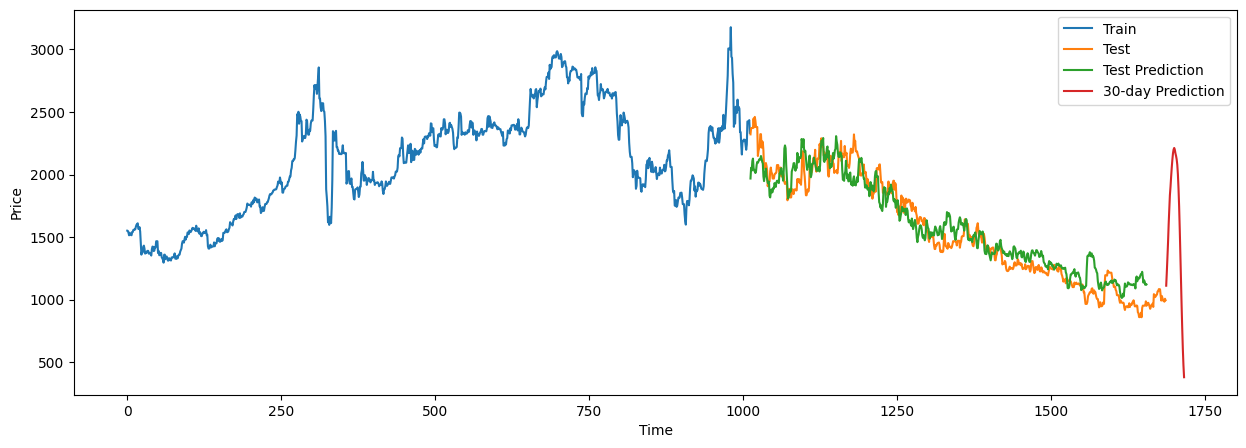

In [20]:
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred)

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output)

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()